<a href="https://colab.research.google.com/github/piyush5566/Behavioral-Intrusion-Detection-in-Network-Traffic/blob/master/cdx2009_pearson_correlation_LABEL_POLY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import preprocessing
from pylab import rcParams
rcParams['figure.figsize']=14,8
RANDOM_SEED=42
LABELS=[False,True]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unrar x "/content/drive/My Drive/Netwok_Security/ASNM-dataset.zip (Unzipped Files)/ASNM-CDX-2009.rar" "/content/drive/My Drive/Netwok_Security/ASNM-dataset.zip (Unzipped Files)/"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/My Drive/Netwok_Security/ASNM-dataset.zip (Unzipped Files)/ASNM-CDX-2009.rar


Would you like to replace the existing file /content/drive/My Drive/Netwok_Security/ASNM-dataset.zip (Unzipped Files)/ASNM-CDX-2009.csv
33335462 bytes, modified on 2017-02-04 17:59
with a new one
33335462 bytes, modified on 2017-02-04 17:59

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit Y

Extracting  /content/drive/My Drive/Netwok_Security/ASNM-dataset.zip (Unzipped Files)/ASNM-CDX-2009.csv       0%  1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 5

##Data Preprocessing

In [ ]:
data=(pd.read_csv("/content/drive/My Drive/Netwok_Security/ASNM-dataset.zip (Unzipped Files)/ASNM-CDX-2009.csv",sep=';',index_col='id'))
      
data=data.drop([c for c in list(data) if data[c].nunique() is 1],axis=1)#dropping columns with number of unique values = 1

In [ ]:
data.head()

,label_2,label_poly,SrcIP,DstIP,SrcPort,DstPort,SrcMAC,DstMAC,SrcIPInVlan,DstIPInVlan,InPkt1s10i[0],InPkt1s10i[1],InPkt1s10i[2],InPkt1s10i[3],InPkt1s10i[4],InPkt1s10i[5],InPkt1s10i[6],InPkt1s10i[7],InPkt1s10i[8],InPkt1s10i[9],InPkt4s10i[0],InPkt4s10i[1],InPkt4s10i[2],InPkt4s10i[3],InPkt4s10i[4],InPkt4s10i[5],InPkt4s10i[6],InPkt4s10i[7],InPkt4s10i[8],InPkt4s10i[9],InPkt8s10i[0],InPkt8s10i[1],InPkt8s10i[2],InPkt8s10i[3],InPkt8s10i[4],InPkt8s10i[5],InPkt8s10i[6],InPkt8s10i[7],InPkt8s10i[8],InPkt8s10i[9],...,GaussProds4In[2],GaussProds4In[3],GaussProds8In[0],GaussProds8In[1],GaussProds8In[2],GaussProds8In[3],GaussProds8In[4],GaussProds8In[5],GaussProds8In[6],GaussProds8In[7],GaussProds1Out[0],GaussProds2Out[0],GaussProds2Out[1],GaussProds4Out[0],GaussProds4Out[1],GaussProds4Out[2],GaussProds4Out[3],GaussProds8Out[0],GaussProds8Out[1],GaussProds8Out[2],GaussProds8Out[3],GaussProds8Out[4],GaussProds8Out[5],GaussProds8Out[6],GaussProds8Out[7],GaussProds1All[0],GaussProds2All[0],GaussProds2All[1],GaussProds4All[0],GaussProds4All[1],GaussProds4All[2],GaussProds4All[3],GaussProds8All[0],GaussProds8All[1],GaussProds8All[2],GaussProds8All[3],GaussProds8All[4],GaussProds8All[5],GaussProds8All[6],GaussProds8All[7]
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,0_other,10.1.60.203,10.1.60.73,63637,5222,00:0C:29:D7:B7:89,00:1A:6C:FB:3D:F0,True,True,5,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.536381,27.932563,18.968168,1.861376,3.031384,3.257409,26.990536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.206032,16.347673,12.284234,17.460909,28.271599,39.854715,13.226058,30.142188,27.376107,65.213653,28.129521,98.002262,34.486082,26.990536,16.262570
2,False,0_apache,10.1.10.69,10.1.60.187,2201,80,00:1E:7A:21:B4:00,00:1A:6C:FB:3D:F0,False,True,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,8,5,3,1,0,0,8,8,0,0,8,51,42,...,6.873797,26.227802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.393079,15.870392,27.447388,25.275107,26.156893,175.694074,16.349902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.164148,14.898874,17.778619,12.400587,35.642225,42.446332,10.750317,25.283971,25.283971,15.870392,175.667483,27.907473,62.828639,26.862012,14.797450
3,False,0_apache,10.1.10.69,10.1.60.187,2201,80,00:1E:7A:21:B4:00,00:1A:6C:FB:3D:F0,False,True,1,3,0,2,0,2,0,1,0,2,6,3,2,0,0,0,0,1,12,20,9,2,0,1,32,68,4,17,0,0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.658626,60.655334,27.447388,1.622057,6.634477,6.714250,24.494950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.169875,33.247735,15.335996,15.870392,61.517329,62.828639,12.236273,25.275107,26.156893,175.667483,27.907473,182.848444,26.254394,26.862012,14.797450
4,False,0_other,10.1.10.69,10.1.60.187,2202,443,00:1E:7A:21:B4:00,00:1A:6C:FB:3D:F0,False,True,1,2,0,1,0,2,0,0,0,0,4,2,0,0,0,0,1,10,14,43,6,0,0,11,57,33,16,5,0,0,...,17.204436,31.414356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.813228,22.921652,18.926762,24.760861,50.780670,94.965838,15.174157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.613480,32.042444,12.925019,14.570249,89.596237,42.162261,11.164318,25.275107,24.760861,25.046723,478.845737,99.885190,19.688286,31.250377,14.821825
5,False,0_apache,10.1.10.69,10.1.60.187,2203,80,00:1E:7A:21:B4:00,00:1A:6C:FB:3D:F0,False,True,4,2,2,3,2,4,3,4,9,7,11,13,39,38,0,3,10,8,0,0,24,77,3,18,0,0,0,0,0,0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.658626,60.655334,27.447388,1.622057,6.634477,6.714250,24.494950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.169875,33.247735,15.335996,15.870392,61.517329,62.828639,12.236273,25.275107,26.156893,175.667483,27.907473,182.848444,26.254394,26.862012,14.797450


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5771 entries, 1 to 5771
Columns: 844 entries, label_2 to GaussProds8All[7]
dtypes: bool(4), float64(331), int64(504), object(5)
memory usage: 37.1+ MB


In [ ]:
data.describe()

,SrcPort,DstPort,InPkt1s10i[0],InPkt1s10i[1],InPkt1s10i[2],InPkt1s10i[3],InPkt1s10i[4],InPkt1s10i[5],InPkt1s10i[6],InPkt1s10i[7],InPkt1s10i[8],InPkt1s10i[9],InPkt4s10i[0],InPkt4s10i[1],InPkt4s10i[2],InPkt4s10i[3],InPkt4s10i[4],InPkt4s10i[5],InPkt4s10i[6],InPkt4s10i[7],InPkt4s10i[8],InPkt4s10i[9],InPkt8s10i[0],InPkt8s10i[1],InPkt8s10i[2],InPkt8s10i[3],InPkt8s10i[4],InPkt8s10i[5],InPkt8s10i[6],InPkt8s10i[7],InPkt8s10i[8],InPkt8s10i[9],InPkt32s10i[0],InPkt32s10i[1],InPkt32s10i[2],InPkt32s10i[3],InPkt32s10i[4],InPkt32s10i[5],InPkt32s10i[6],InPkt32s10i[7],...,GaussProds4In[2],GaussProds4In[3],GaussProds8In[0],GaussProds8In[1],GaussProds8In[2],GaussProds8In[3],GaussProds8In[4],GaussProds8In[5],GaussProds8In[6],GaussProds8In[7],GaussProds1Out[0],GaussProds2Out[0],GaussProds2Out[1],GaussProds4Out[0],GaussProds4Out[1],GaussProds4Out[2],GaussProds4Out[3],GaussProds8Out[0],GaussProds8Out[1],GaussProds8Out[2],GaussProds8Out[3],GaussProds8Out[4],GaussProds8Out[5],GaussProds8Out[6],GaussProds8Out[7],GaussProds1All[0],GaussProds2All[0],GaussProds2All[1],GaussProds4All[0],GaussProds4All[1],GaussProds4All[2],GaussProds4All[3],GaussProds8All[0],GaussProds8All[1],GaussProds8All[2],GaussProds8All[3],GaussProds8All[4],GaussProds8All[5],GaussProds8All[6],GaussProds8All[7]
count,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,...,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000,5771.000000
mean,39220.685843,340.984925,7.046959,7.456247,7.514815,6.808525,7.348986,6.960319,6.873332,7.116271,6.897765,7.076243,28.826373,28.298388,27.755155,26.937273,26.690348,25.957893,25.461272,24.937099,24.465431,24.095304,57.122163,54.692428,52.648241,50.398371,48.560735,46.702824,45.122509,43.631606,42.354011,40.879744,214.861203,184.011263,160.699359,136.718246,134.384335,135.437879,127.670421,124.324207,...,43.893182,39.047172,1.689815,6.096798,4.480161,7.375319,8.256571,9.286250,7.869505,6.954884,25.062379,35.421374,27.178316,17.955402,23.314307,32.412449,21.621486,8.359402,25.426350,16.109169,14.608235,29.143210,31.714685,13.022221,8.076879,17.364551,28.308393,20.045328,24.094897,45.041043,52.997624,16.450495,22.062825,29.577259,118.589119,40.282891,112.217032,59.488651,32.538063,16.191687
std,24358.193471,725.021824,7.289772,9.367462,9.934251,9.687397,9.813364,9.831033,9.593184,9.726012,9.588769,9.519973,35.361750,38.203288,37.423533,37.221309,36.579421,36.351526,35.857015,35.286144,34.635057,34.029479,73.028810,74.131065,72.411303,70.609085,68.115799,65.945237,63.655243,61.238031,58.823777,55.883350,282.270950,249.987539,206.722176,148.989324,142.253173,142.261652,140.223401,135.006043,...,74.304741,51.674748,11.136287,44.110848,28.837308,44.781396,48.382762,56.014706,50.028247,35.936420,15.308178,28.168170,15.379327,28.228207,50.740281,43.373078,13.789949,19.000458,65.462950,57.718612,49.415400,61.292629,72.065714,34.748099,13.058834,6.004700,10.248739,9.288444,11.851015,20.022812,27.213690,8.678672,11.592764,20.182041,76.973307,60.324614,86.172839,52.455015,35.952925,6.978461
min,1032.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000

In [ ]:
#check any null value in data
data.isnull().values.any()

False

0_apache     2911
0_other      2637
0_postfix     179
1_apache       37
1_postfix       7
Name: label_poly, dtype: int64

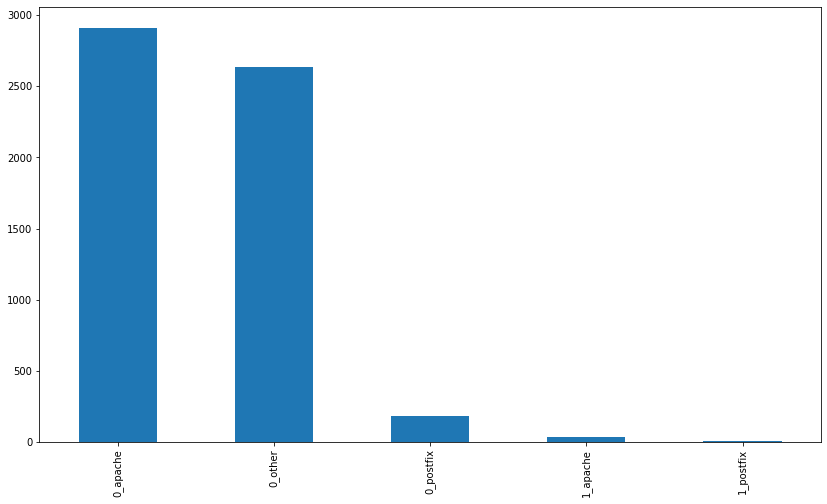

In [ ]:
#visualization of distribution of five classes attack in network flows
count_classes=pd.value_counts(data['label_poly'])
count_classes.plot(kind='bar')
count_classes

In [ ]:
#Encoding 0_apache,0_other,0_postfix,1_apache,1_postfix into labels 0,1,2,3 and 4
le = preprocessing.LabelEncoder()
le.fit(data['label_poly'])
data['label_poly'] = le.transform(data['label_poly'])

In [ ]:
data['label_poly'].head()

id
1    1
2    0
3    0
4    1
5    0
Name: label_poly, dtype: int64

In [ ]:
#Encoding False and True into labels 0 and 1
le.fit(data['label_2'])
#le.transform(data['label_2'])
data['label_2'] = le.transform(data['label_2'])

data.head()

,label_2,label_poly,SrcIP,DstIP,SrcPort,DstPort,SrcMAC,DstMAC,SrcIPInVlan,DstIPInVlan,InPkt1s10i[0],InPkt1s10i[1],InPkt1s10i[2],InPkt1s10i[3],InPkt1s10i[4],InPkt1s10i[5],InPkt1s10i[6],InPkt1s10i[7],InPkt1s10i[8],InPkt1s10i[9],InPkt4s10i[0],InPkt4s10i[1],InPkt4s10i[2],InPkt4s10i[3],InPkt4s10i[4],InPkt4s10i[5],InPkt4s10i[6],InPkt4s10i[7],InPkt4s10i[8],InPkt4s10i[9],InPkt8s10i[0],InPkt8s10i[1],InPkt8s10i[2],InPkt8s10i[3],InPkt8s10i[4],InPkt8s10i[5],InPkt8s10i[6],InPkt8s10i[7],InPkt8s10i[8],InPkt8s10i[9],...,GaussProds4In[2],GaussProds4In[3],GaussProds8In[0],GaussProds8In[1],GaussProds8In[2],GaussProds8In[3],GaussProds8In[4],GaussProds8In[5],GaussProds8In[6],GaussProds8In[7],GaussProds1Out[0],GaussProds2Out[0],GaussProds2Out[1],GaussProds4Out[0],GaussProds4Out[1],GaussProds4Out[2],GaussProds4Out[3],GaussProds8Out[0],GaussProds8Out[1],GaussProds8Out[2],GaussProds8Out[3],GaussProds8Out[4],GaussProds8Out[5],GaussProds8Out[6],GaussProds8Out[7],GaussProds1All[0],GaussProds2All[0],GaussProds2All[1],GaussProds4All[0],GaussProds4All[1],GaussProds4All[2],GaussProds4All[3],GaussProds8All[0],GaussProds8All[1],GaussProds8All[2],GaussProds8All[3],GaussProds8All[4],GaussProds8All[5],GaussProds8All[6],GaussProds8All[7]
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,1,10.1.60.203,10.1.60.73,63637,5222,00:0C:29:D7:B7:89,00:1A:6C:FB:3D:F0,True,True,5,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.536381,27.932563,18.968168,1.861376,3.031384,3.257409,26.990536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.206032,16.347673,12.284234,17.460909,28.271599,39.854715,13.226058,30.142188,27.376107,65.213653,28.129521,98.002262,34.486082,26.990536,16.262570
2,0,0,10.1.10.69,10.1.60.187,2201,80,00:1E:7A:21:B4:00,00:1A:6C:FB:3D:F0,False,True,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,8,5,3,1,0,0,8,8,0,0,8,51,42,...,6.873797,26.227802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.393079,15.870392,27.447388,25.275107,26.156893,175.694074,16.349902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.164148,14.898874,17.778619,12.400587,35.642225,42.446332,10.750317,25.283971,25.283971,15.870392,175.667483,27.907473,62.828639,26.862012,14.797450
3,0,0,10.1.10.69,10.1.60.187,2201,80,00:1E:7A:21:B4:00,00:1A:6C:FB:3D:F0,False,True,1,3,0,2,0,2,0,1,0,2,6,3,2,0,0,0,0,1,12,20,9,2,0,1,32,68,4,17,0,0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.658626,60.655334,27.447388,1.622057,6.634477,6.714250,24.494950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.169875,33.247735,15.335996,15.870392,61.517329,62.828639,12.236273,25.275107,26.156893,175.667483,27.907473,182.848444,26.254394,26.862012,14.797450
4,0,1,10.1.10.69,10.1.60.187,2202,443,00:1E:7A:21:B4:00,00:1A:6C:FB:3D:F0,False,True,1,2,0,1,0,2,0,0,0,0,4,2,0,0,0,0,1,10,14,43,6,0,0,11,57,33,16,5,0,0,...,17.204436,31.414356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.813228,22.921652,18.926762,24.760861,50.780670,94.965838,15.174157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.613480,32.042444,12.925019,14.570249,89.596237,42.162261,11.164318,25.275107,24.760861,25.046723,478.845737,99.885190,19.688286,31.250377,14.821825
5,0,0,10.1.10.69,10.1.60.187,2203,80,00:1E:7A:21:B4:00,00:1A:6C:FB:3D:F0,False,True,4,2,2,3,2,4,3,4,9,7,11,13,39,38,0,3,10,8,0,0,24,77,3,18,0,0,0,0,0,0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.658626,60.655334,27.447388,1.622057,6.634477,6.714250,24.494950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.169875,33.247735,15.335996,15.870392,61.517329,62.828639,12.236273,25.275107,26.156893,175.667483,27.907473,182.848444,26.254394,26.862012,14.797450


In [ ]:
#Excluding columns like SrcMac with dtype = 'object'
data=data.select_dtypes(exclude = ['object'])
data.head()

,label_2,label_poly,SrcPort,DstPort,SrcIPInVlan,DstIPInVlan,InPkt1s10i[0],InPkt1s10i[1],InPkt1s10i[2],InPkt1s10i[3],InPkt1s10i[4],InPkt1s10i[5],InPkt1s10i[6],InPkt1s10i[7],InPkt1s10i[8],InPkt1s10i[9],InPkt4s10i[0],InPkt4s10i[1],InPkt4s10i[2],InPkt4s10i[3],InPkt4s10i[4],InPkt4s10i[5],InPkt4s10i[6],InPkt4s10i[7],InPkt4s10i[8],InPkt4s10i[9],InPkt8s10i[0],InPkt8s10i[1],InPkt8s10i[2],InPkt8s10i[3],InPkt8s10i[4],InPkt8s10i[5],InPkt8s10i[6],InPkt8s10i[7],InPkt8s10i[8],InPkt8s10i[9],InPkt32s10i[0],InPkt32s10i[1],InPkt32s10i[2],InPkt32s10i[3],...,GaussProds4In[2],GaussProds4In[3],GaussProds8In[0],GaussProds8In[1],GaussProds8In[2],GaussProds8In[3],GaussProds8In[4],GaussProds8In[5],GaussProds8In[6],GaussProds8In[7],GaussProds1Out[0],GaussProds2Out[0],GaussProds2Out[1],GaussProds4Out[0],GaussProds4Out[1],GaussProds4Out[2],GaussProds4Out[3],GaussProds8Out[0],GaussProds8Out[1],GaussProds8Out[2],GaussProds8Out[3],GaussProds8Out[4],GaussProds8Out[5],GaussProds8Out[6],GaussProds8Out[7],GaussProds1All[0],GaussProds2All[0],GaussProds2All[1],GaussProds4All[0],GaussProds4All[1],GaussProds4All[2],GaussProds4All[3],GaussProds8All[0],GaussProds8All[1],GaussProds8All[2],GaussProds8All[3],GaussProds8All[4],GaussProds8All[5],GaussProds8All[6],GaussProds8All[7]
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,1,63637,5222,True,True,5,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,5,0,0,0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.536381,27.932563,18.968168,1.861376,3.031384,3.257409,26.990536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.206032,16.347673,12.284234,17.460909,28.271599,39.854715,13.226058,30.142188,27.376107,65.213653,28.129521,98.002262,34.486082,26.990536,16.262570
2,0,0,2201,80,False,True,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,8,5,3,1,0,0,8,8,0,0,8,51,42,9,16,114,0,...,6.873797,26.227802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.393079,15.870392,27.447388,25.275107,26.156893,175.694074,16.349902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.164148,14.898874,17.778619,12.400587,35.642225,42.446332,10.750317,25.283971,25.283971,15.870392,175.667483,27.907473,62.828639,26.862012,14.797450
3,0,0,2201,80,False,True,1,3,0,2,0,2,0,1,0,2,6,3,2,0,0,0,0,1,12,20,9,2,0,1,32,68,4,17,0,0,12,121,0,0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.658626,60.655334,27.447388,1.622057,6.634477,6.714250,24.494950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.169875,33.247735,15.335996,15.870392,61.517329,62.828639,12.236273,25.275107,26.156893,175.667483,27.907473,182.848444,26.254394,26.862012,14.797450
4,0,1,2202,443,False,True,1,2,0,1,0,2,0,0,0,0,4,2,0,0,0,0,1,10,14,43,6,0,0,11,57,33,16,5,0,0,17,111,0,0,...,17.204436,31.414356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.813228,22.921652,18.926762,24.760861,50.780670,94.965838,15.174157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.613480,32.042444,12.925019,14.570249,89.596237,42.162261,11.164318,25.275107,24.760861,25.046723,478.845737,99.885190,19.688286,31.250377,14.821825
5,0,0,2203,80,False,True,4,2,2,3,2,4,3,4,9,7,11,13,39,38,0,3,10,8,0,0,24,77,3,18,0,0,0,0,0,0,122,0,0,0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.658626,60.655334,27.447388,1.622057,6.634477,6.714250,24.494950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.169875,33.247735,15.335996,15.870392,61.517329,62.828639,12.236273,25.275107,26.156893,175.667483,27.907473,182.848444,26.254394,26.862012,14.797450


In [ ]:
data['PolyInd3ordOut[1]'].head()

id
1    -35.000000
2    -95.571429
3   -438.000000
4    -84.000000
5   -438.000000
Name: PolyInd3ordOut[1], dtype: float64

PEARSON CORRELATION COEFFICIENT

We will use Pearson correlation coefficient to select the features mostly related with the column 'label_2', taking 0.3 as the threshold for selection.

PEARSON CORRELATION COEFFICIENT

We will use Pearson correlation coefficient to select the features mostly related with the column 'label_2', taking 0.3 as the threshold for selection.

In [ ]:
useful_data=data[(c for c in list(data) if data['label_poly'].corr(data[c])>0.3)]
useful_data 

,label_2,label_poly,OutPkt1s20iTr4KB[0],OutPkt4s20iTr4KB[0],OutPkt8s20iTr4KB[0],OutPkt32s20iTr4KB[0],OutPkt64s20iTr4KB[0],InPkt64s20iTr2KB[1],InPkt64s20iTr1KB[1],InPkt64s20iTr1KB[2],OutPkt64s20iTr2KB[0],OutPkt64s20iTr1KB[0],OutPkt64s20iTr1KB[1],MeanPktLenIn,SigPktLenIn,SumTTLOut,CntDataPktIn,CntNondPktOut,CntResendPktsOut,PolyInd3ordOut[1],PolyInd3ordIn[1],PolyInd5ordOut[0],PolyInd5ordOut[3],PolyInd5ordOut[4],PolyInd5ordIn[5],PolyInd8ordIn[6],PolyInd13ordIn[10],PolyInd13ordIn[13],FourGonModulIn[1],FourGonModulIn[2],FourGonModulIn[3],FourGonModulIn[5],FourGonModulIn[6],FourGonModulIn[7],FourGonAngleIn[3],FourGonAngleIn[6],FourGonAngleIn[7],FourGonModulOut[8],FourGonAngleOut[3],FourGonAngleOut[4],GaussProds2In[0],GaussProds4In[0],GaussProds4In[1],GaussProds4In[2],GaussProds4In[3],GaussProds4Out[2],GaussProds8Out[7],GaussProds4All[0],GaussProds8All[5]
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,1,6,6,6,6,6,0,0,0,6,6,0,103.200000,78.785786,384,1,4,1,-35.000000,-50.800000,-3572.600002,-441.036474,-261.353145,-162.031432,-1125.727740,-55.959024,-270.425176,171.592306,180.632446,180.632446,0.000000,0.000000,0.000000,-69.585920,0.000000,0.000000,0.000000,0.000000,-105.463946,27.739518,0.000000,0.000000,0.000000,0.000000,3.257409,0.000000,17.460909,34.486082
2,0,0,1,7,7,7,7,0,0,0,7,7,0,126.833333,161.750940,882,1,6,4,-95.571429,195.000000,652.666667,374.122077,-95.496857,-304.050736,-1462.293212,347.080890,194.094383,394.003807,398.003769,397.000000,394.003807,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,-103.196435,103.196435,15.910279,1.648648,1.622057,6.873797,26.227802,175.694074,0.000000,12.400587,62.828639
3,0,0,6,6,6,6,6,0,0,0,6,6,0,139.800000,177.322305,756,1,5,3,-438.000000,-251.200000,-15863.733342,-1973.853385,-987.747836,-315.710516,-2421.015185,-229.957458,-590.569319,395.383714,397.622584,397.622584,0.000000,0.000000,0.000000,-71.725912,0.000000,0.000000,0.000000,0.000000,-118.941569,26.236666,0.000000,0.000000,0.000000,0.000000,6.714250,0.000000,15.870392,26.254394
4,0,1,7,7,7,7,7,0,3,0,7,7,0,258.833333,459.831020,882,3,5,2,-84.000000,-1415.666667,1008.250000,469.288162,-101.140218,504.719351,7856.797409,-1558.659450,-1408.138382,1146.884475,1109.163649,1119.000000,1146.884475,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-88.708808,88.708808,152.430932,1.622057,16.712500,17.204436,31.414356,94.965838,0.000000,14.570249,19.688286
5,0,0,6,6,6,6,6,0,0,0,6,6,0,139.800000,177.322305,756,1,5,3,-438.000000,-251.200000,-15863.733342,-1973.853385,-987.747836,-315.710516,-2421.015185,-229.957458,-590.569319,395.383714,397.622584,397.622584,0.000000,0.000000,0.000000,-71.725912,0.000000,0.000000,0.000000,0.000000,-118.941569,26.236666,0.000000,0.000000,0.000000,0.000000,6.714250,0.000000,15.870392,26.254394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5767,0,2,4,4,4,4,4,0,0,0,4,4,0,69.500000,10.606602,504,1,4,1,68.000000,-10.494027,-0.867815,-1.329507,-35.073120,216.000000,-17816.935065,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.648648,0.000000
5768,0,0,4,4,4,4,4,0,0,0,4,4,0,61.000000,1.414214,504,0,4,1,68.000000,-2.996540,-0.867815,-1.329507,-35.073120,1314.000000,-13.298701,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.648648,0.000000
5769,0,1,2,4,4,4,4,0,0,0,4,4,0,60.666667,1.154701,504,0,4,1,68.000000,52.011730,-0.867815,-1.329507,-35.073120,-29.314979,0.115958,-1.187640,-5.711309,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.2751

In [ ]:
#dividing data into X and Y
columns=useful_data.columns.tolist()
columns=[c for c in columns if c not in ["label_poly"]]
target="label_poly"
state=np.random.RandomState(42)
X=useful_data[columns]
# X=preprocessing.normalize(useful_data[columns])
Y=useful_data[target].astype(int)
print(X.shape)
print(Y.shape)



(5771, 48)
(5771,)


In [ ]:
from sklearn.model_selection import train_test_split

#Splitting data into training and test data with test size 0.25
train_x,test_x,y_train,y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
#train_x,cv_x,y_train,y_cv = train_test_split(train_x, y_train, test_size=0.25, random_state=42)

In [ ]:
#Dropping all columns with negative columns in X
X_positive = X.loc[:,(X>=0).all()]
(X_positive >= 0).all()

label_2                 True
OutPkt1s20iTr4KB[0]     True
OutPkt4s20iTr4KB[0]     True
OutPkt8s20iTr4KB[0]     True
OutPkt32s20iTr4KB[0]    True
OutPkt64s20iTr4KB[0]    True
InPkt64s20iTr2KB[1]     True
InPkt64s20iTr1KB[1]     True
InPkt64s20iTr1KB[2]     True
OutPkt64s20iTr2KB[0]    True
OutPkt64s20iTr1KB[0]    True
OutPkt64s20iTr1KB[1]    True
MeanPktLenIn            True
SigPktLenIn             True
SumTTLOut               True
CntDataPktIn            True
CntNondPktOut           True
CntResendPktsOut        True
FourGonModulIn[1]       True
FourGonModulIn[2]       True
FourGonModulIn[3]       True
FourGonModulIn[5]       True
FourGonModulIn[6]       True
FourGonModulIn[7]       True
FourGonModulOut[8]      True
GaussProds2In[0]        True
GaussProds4In[0]        True
GaussProds4In[1]        True
GaussProds4In[2]        True
GaussProds4In[3]        True
GaussProds4Out[2]       True
GaussProds8Out[7]       True
GaussProds4All[0]       True
GaussProds8All[5]       True
dtype: bool

In [ ]:
from sklearn.model_selection import train_test_split

#Splitting data into training and test data with test size 0.25
train_x_pos,test_x_pos,y_train_pos,y_test_pos = train_test_split(X_positive, Y, test_size=0.25, random_state=42)
#train_x_pos,cv_x_pos,y_train_pos,y_cv_pos = train_test_split(train_x_pos, y_train_pos, test_size=0.25, random_state=42)

##Multinomial Naive Bayes, Gaussian Naive Bayes, Support Vector Machine, Random Forest and K Nearest Neighbors(KNN)


In [ ]:
#Creating parameter grid of differnt values we want to try oue model on
param_svm=param_mnb={'alpha':[0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}
param_rf={'n_estimators':[100,200,500,1000,2000],'max_depth':[5, 10]}
param_knn={'n_neighbors':[5, 11, 15, 21, 31, 41, 51, 99]}

In [ ]:
#preparing a dictionary of 5 classifiers
classifiers={
    #"Isolation Forest":IsolationForest(n_estimators=100,max_samples=len(X),contamination=outlier_fraction,random_state=state,verbose=0),
    #"Local Outlier Factor":LocalOutlierFactor(n_neighbors=20,algorithm='auto',leaf_size=30,metric='minkowski',p=2,metric_params=None,
                                              #contamination=outlier_fraction),
    "Multinomial Naive Bayes":MultinomialNB(), 
    "Gaussian Naive Bayes":GaussianNB(),        
    "Support Vector Machine":SGDClassifier( class_weight='balanced',penalty='l2', loss='hinge', random_state=42),
    "Random Forest":RandomForestClassifier(criterion='gini', random_state=42, n_jobs=-1),
    "K Nearest Neighbours":KNeighborsClassifier()
}

In [ ]:
#n_outliers=count_classes[0]

for i,(clf_name,clf) in enumerate(classifiers.items()):
    if clf_name=='Multinomial Naive Bayes':
        gs_clf = GridSearchCV(clf,param_mnb,scoring='f1_weighted')
        gs_clf.fit(train_x_pos,y_train_pos)#training Multinomial Naive Bayes classifier only on non-negative data
        print(clf_name.upper())
        print()
        print('Cross-Validation Weighted Average of f1 : ',gs_clf.best_score_)   
        y_pred=gs_clf.predict(test_x_pos)
        print("Classification report :")
        print(classification_report(y_test_pos,y_pred))
        pd.DataFrame(y_pred,y_test).to_csv("output"+clf_name+".csv")
    elif clf_name=='Gaussian Naive Bayes':
        gs_clf = GridSearchCV(clf,{},scoring='f1_weighted')
        gs_clf.fit(train_x,y_train)
        print(clf_name.upper())
        print()
        print('Cross-Validation Weighted Average of f1 : ',gs_clf.best_score_)   
    elif clf_name=='Support Vector Machine':
        gs_clf = GridSearchCV(clf,param_svm,scoring='f1_weighted')
        gs_clf.fit(train_x,y_train)
        print(clf_name.upper())
        print()
        print('Cross-Validation Weighted Average of f1 : ',gs_clf.best_score_) 
    elif clf_name=='Random Forest':
        gs_clf = GridSearchCV(clf,param_rf,scoring='f1_weighted')
        gs_clf.fit(train_x,y_train)
        print(clf_name.upper())
        print()
        print('Cross-Validation Weighted Average of f1 : ',gs_clf.best_score_)   
    else:
        gs_clf = GridSearchCV(clf,param_knn,scoring='f1_weighted')
        gs_clf.fit(train_x,y_train)
        print(clf_name.upper())
        print()
        print('Cross-Validation Weighted Average of f1 : ',gs_clf.best_score_)  
    #y_pred[y_pred==1]=0
    #y_pred[y_pred==-1]=1
    #n_errors=(y_pred!=Y).sum()
    #print("{}:{}".format(clf_name,n_errors))
    
    #print("Accuracy Score :")
    #print(accuracy_score(Y,y_pred))
    if clf_name != 'Multinomial Naive Bayes':
        y_pred = gs_clf.predict(test_x)
        print("Classification report :")
        print(classification_report(y_test,y_pred))
        pd.DataFrame(y_pred,y_test).to_csv("output"+clf_name+".csv")

MULTINOMIAL NAIVE BAYES

Cross-Validation Weighted Average of f1 :  0.8767706157986946
Classification report :
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       738
           1       0.98      0.78      0.87       650
           2       0.33      0.98      0.49        43
           3       0.22      0.80      0.34        10
           4       0.00      0.00      0.00         2

    accuracy                           0.85      1443
   macro avg       0.49      0.69      0.53      1443
weighted avg       0.94      0.85      0.88      1443

GAUSSIAN NAIVE BAYES

Cross-Validation Weighted Average of f1 :  0.8990893572363788
Classification report :
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       738
           1       0.97      0.82      0.89       650
           2       0.35      0.91      0.51        43
           3       0.67      0.80      0.73        10
           4       0.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K NEAREST NEIGHBOURS

Cross-Validation Weighted Average of f1 :  0.9736505413675423
Classification report :
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       738
           1       0.97      0.98      0.97       650
           2       0.92      0.84      0.88        43
           3       1.00      0.70      0.82        10
           4       0.00      0.00      0.00         2

    accuracy                           0.97      1443
   macro avg       0.77      0.70      0.73      1443
weighted avg       0.97      0.97      0.97      1443



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
